In [1]:
from PIL import Image
import numpy as np

### chair의 이미지 해상도 통일하여 적용하기 Test


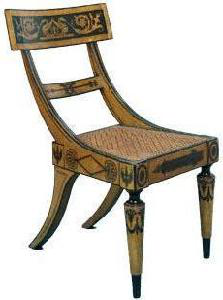

In [2]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0001.jpg")
img

In [3]:
# 배열 확인 (세로,가로,RGB)
np.array(img).shape

(300, 223, 3)

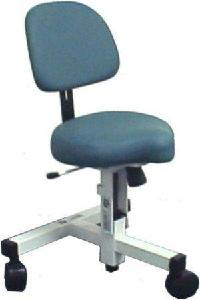

In [4]:
# Image 불러오기
img = Image.open("../Data/cnn/chair/image_0002.jpg")
img

In [5]:
# 배열 확인 (세로,가로,RGB)
np.array(img).shape

(300, 200, 3)

In [6]:
# 너비 해상도 구하기
# 배열 확인 (세로,가로,RGB)
np.array(img).shape[1]

200

---
### chair 전체 이미지의 해상도 평균구하기

In [7]:
import glob

In [8]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    # print(img.shape[1])
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [9]:
print("chair의 너비 평균 해상도 :",np.max(widthRatio))
print("chair의 높이 평균 해상도 :",np.max(heightRatio))

chair의 너비 평균 해상도 : 300
chair의 높이 평균 해상도 : 300


In [10]:
# 갯수 확인
len(widthRatio)

62

In [11]:
len(widthRatio) == len(heightRatio)

True

> 너비 : 231, 높이 : 297 로 지정

---
### Chair의 이미지 해상도 변경 및 Gray Scale로 적용하기


In [12]:
# Chair의 파일 갯수(62개)와 laptop의 파일갯수(81개)를 60개로 맞추기
i = 0 
for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300,300),resample = Image.LANCZOS)
    imgResize = imgResize.convert('L')# Grayscale, 투명도가 있는 경우에는 LA 
    imgResize.save("../Data/cnn/chairNew/image_%04d.jpg"%i,'JPEG')
    i += 1
    if i >= 60:
        break

---
# Laptop의 이미지 해상도 변경 및 Grayscale로 적용하기

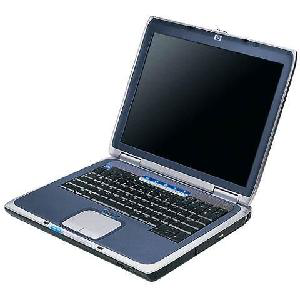

In [13]:
img1 = Image.open("../Data/cnn/laptop/image_0001.jpg")
img1

In [14]:
# 배열 확인 (세로,가로,RGB)
np.array(img1).shape[1]

300

In [15]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img1 = np.array(Image.open(file),dtype=np.int32)
    # print(img.shape[1])
    widthRatio.append(img1.shape[1])
    heightRatio.append(img1.shape[0])

In [16]:
# laptop의 파일 갯수(62개)와 laptop의 파일갯수(81개)를 60개로 맞추기
i = 0 
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300,300),resample = Image.LANCZOS)
    imgResize = imgResize.convert('L')# Grayscale, 투명도가 있는 경우에는 LA 
    imgResize.save("../Data/cnn/laptopNew/image_%04d.jpg"%i,'JPEG')
    i += 1
    if i >= 60:
        break

---
# chair image를 numpy로 변경하기

In [17]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [18]:
chairData = np.zeros(
    number_of_data *img_width_size*img_height_size,dtype=np.int32
).reshape(number_of_data,img_height_size,img_width_size)

In [19]:
chairData.shape

(60, 350, 350)

In [20]:
i = 0

for file in sorted(glob.glob("../Data/cnn/chairNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i, 25:-25, 25:-25] = img
    i += 1

In [21]:
chairData.shape

(60, 350, 350)

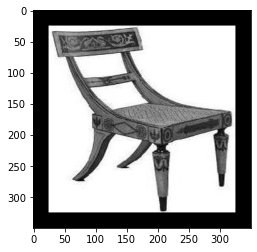

In [22]:
# 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(chairData[0].reshape(350,350),cmap='gray')
plt.show()

---
### laptop image를 numpy로 변경하기

In [23]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [24]:
laptopData = np.zeros(
    number_of_data *img_width_size*img_height_size,dtype=np.int32
).reshape(number_of_data,img_height_size,img_width_size)

In [25]:
laptopData.shape

(60, 350, 350)

In [26]:
i = 0 
for file in sorted(glob.glob("../Data/cnn/laptopNew/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    laptopData[i,25:-25,25:-25] = img
    i += 1

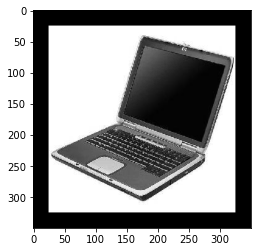

In [27]:
plt.imshow(laptopData[0].reshape(350,350),cmap='gray')
plt.show()

---
# numpy data를  train data로 합치기

In [28]:
train = np.concatenate([chairData,laptopData])
train.shape

(120, 350, 350)

In [29]:
### target data 만들기
target = np.concatenate([np.zeros(60),np.ones(60)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [30]:
train = train.reshape(-1,350,350,1) / 255.0

In [31]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(

    train, target ,test_size= 0.2 , random_state=30
)

trainData , valData ,trainTarget, valTarget = train_test_split(
    train_input,train_target,test_size=0.2,random_state=30
)

In [32]:
print(trainData.shape)
print(valData.shape)
print(trainTarget.shape)
print(valTarget.shape)

(76, 350, 350, 1)
(20, 350, 350, 1)
(76,)
(20,)


In [33]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [34]:
from tensorflow import keras

model = keras.Sequential()

In [35]:
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (350,350,1)
    )
)

In [36]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [37]:
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same'
    )
)

In [38]:
model.add(keras.layers.MaxPooling2D(2))

In [39]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(2,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 484416)            0         
                                                                 
 dense (Dense)               (None, 100)               4

In [41]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = 'accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_cnn_ex_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    trainData , 
    trainTarget ,
    epochs = 20 ,
    validation_data = (valData , valTarget) ,
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/20
3/3 [==============================] - 16s 5s/step - loss: 7.5431 - accuracy: 0.5789 - val_loss: 9.3368 - val_accuracy: 0.3500
Epoch 2/20
3/3 [==============================] - 14s 5s/step - loss: 4.9455 - accuracy: 0.5263 - val_loss: 2.0370 - val_accuracy: 0.6500
Epoch 3/20
3/3 [==============================] - 13s 5s/step - loss: 2.8936 - accuracy: 0.5658 - val_loss: 0.5472 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 12s 5s/step - loss: 0.8555 - accuracy: 0.5526 - val_loss: 0.6798 - val_accuracy: 0.4500
Epoch 5/20
3/3 [==============================] - 13s 5s/step - loss: 0.6171 - accuracy: 0.6184 - val_loss: 0.5345 - val_accuracy: 0.6500
Epoch 6/20
3/3 [==============================] - 12s 5s/step - loss: 0.5503 - accuracy: 0.6974 - val_loss: 0.6527 - val_accuracy: 0.5500
Epoch 7/20
3/3 [==============================] - 12s 5s/step - loss: 0.4283 - accuracy: 0.8158 - val_loss: 0.5327 - val_accuracy: 0.8000
Epoch 8/20
3/3 [==================

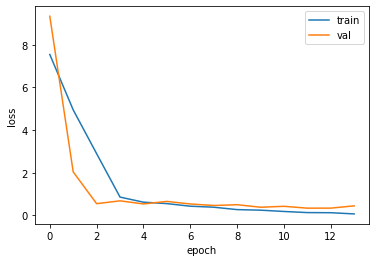

In [42]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [43]:
model.evaluate(valData,valTarget)

1/1 [==============================] - 0s 440ms/step - loss: 0.3362 - accuracy: 0.8000


[0.33619368076324463, 0.800000011920929]

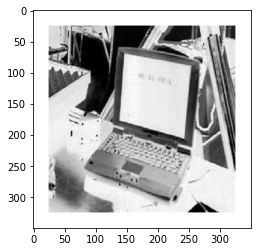

In [44]:
plt.imshow(valData[0].reshape(350,350),cmap='gray_r')
plt.show()

In [45]:
pred = model.predict(valData[0:1])
print(pred)

1/1 [==============================] - 0s 203ms/step
[[0.34578207 0.8775958 ]]


In [46]:
# 계단함수
import numpy as np

classes = ['Chair','Laptop']

In [47]:
print(classes[np.argmax(pred)])

Laptop


In [48]:
test_scaled = test_input.reshape(-1,350,350,1)

In [49]:
model.evaluate(test_scaled,test_target)

1/1 [==============================] - 0s 464ms/step - loss: 0.3779 - accuracy: 0.8333


[0.3779139518737793, 0.8333333134651184]

In [50]:
i = 0 
for file in sorted(glob.glob("../Data/cnn/test/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300,300),resample = Image.LANCZOS)
    imgResize = imgResize.convert('L')# Grayscale, 투명도가 있는 경우에는 LA 
    imgResize.save("../Data/cnn/testNew/image_%04d.jpg"%i,'JPEG')
    i += 1
    if i >= 2:
        break


In [51]:
number_of_data = 2
img_width_size = 350
img_height_size = 350

In [52]:
testData = np.zeros(
    number_of_data *img_width_size*img_height_size,dtype=np.int32
).reshape(number_of_data,img_height_size,img_width_size)

In [53]:
testData.shape

(2, 350, 350)

In [54]:
i = 0 
for file in sorted(glob.glob("../Data/cnn/testNew/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    testData[i,25:-25,25:-25] = img
    i += 1
    if i >= 2:
        break

In [55]:
pred = model.predict(valData[0:1])
print(pred)

1/1 [==============================] - 0s 52ms/step
[[0.34578207 0.8775958 ]]


In [56]:
print(classes[np.argmax(pred)])

Laptop


In [57]:
pred = model.predict(testData[0:1])
print(pred)

1/1 [==============================] - 0s 107ms/step
[[1. 1.]]


In [58]:
print(classes[np.argmax(pred)])

Chair


In [59]:
pred = model.predict(testData[1:2])
print(pred)

1/1 [==============================] - 0s 52ms/step
[[0. 1.]]


In [60]:
print(classes[np.argmax(pred)])

Laptop


---
# Piano 데이터로 CNN 학습하기

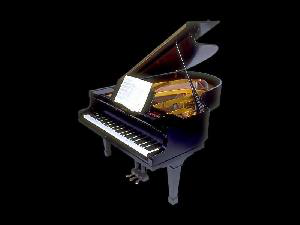

In [61]:
img = Image.open("../Data/cnn/piano/image_0001.jpg")
img

In [62]:
np.array(img).shape

(225, 300, 3)

In [63]:
i = 0 
for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300,300),resample = Image.LANCZOS)
    imgResize = imgResize.convert('L')# Grayscale, 투명도가 있는 경우에는 LA 
    imgResize.save("../Data/cnn/pianoNew/image_%04d.jpg"%i,'JPEG')
    i += 1
    if i >= 60:
        break

In [64]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [65]:
pianoData = np.zeros(
    number_of_data *img_width_size*img_height_size,dtype=np.int32
).reshape(number_of_data,img_height_size,img_width_size)

In [66]:
i = 0 
for file in sorted(glob.glob("../Data/cnn/pianoNew/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    pianoData[i,25:-25,25:-25] = img
    i += 1

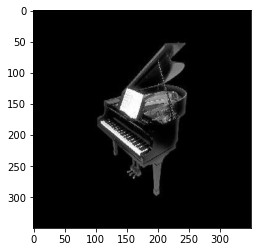

In [67]:
plt.imshow(pianoData[0].reshape(350,350),cmap='gray')
plt.show()

---
# numpy로 train data 합치기

In [68]:
train1 = np.concatenate([chairData,laptopData,pianoData])
train1.shape

(180, 350, 350)

In [69]:
### target data 만들기
target1 = np.concatenate([np.zeros(60),np.ones(60),np.full(60,2)])
target1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [70]:
train1 = train1.reshape(-1,350,350,1) / 255.0

In [71]:
from sklearn.model_selection import train_test_split

train_input1, test_input1, train_target1, test_target1 = train_test_split(

    train1, target1 ,test_size= 0.2 , random_state=30
)

trainData1 , valData1 ,trainTarget1, valTarget1 = train_test_split(
    train_input1,train_target1,test_size=0.2,random_state=30
)

In [72]:
from tensorflow import keras

model1 = keras.Sequential()

In [73]:
model1.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (350,350,1)
    )
)

In [74]:
model1.add(
    keras.layers.MaxPooling2D(2)
)

In [75]:
model1.add(
    keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same'
    )
)

In [76]:
model1.add(
    keras.layers.MaxPooling2D(2)
)

In [77]:
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(100,activation='relu'))
model1.add(keras.layers.Dropout(0.4))
model1.add(keras.layers.Dense(3,activation='softmax'))

In [78]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 175, 175, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 484416)            0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [79]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = 'accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_cnn_ex1_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model1.fit(
    trainData1 , 
    trainTarget1 ,
    epochs = 20 ,
    validation_data = (valData1 , valTarget1) ,
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/20
4/4 [==============================] - 20s 5s/step - loss: 6.9029 - accuracy: 0.3478 - val_loss: 4.5065 - val_accuracy: 0.2414
Epoch 2/20
4/4 [==============================] - 16s 4s/step - loss: 2.5976 - accuracy: 0.4348 - val_loss: 1.3650 - val_accuracy: 0.3448
Epoch 3/20
4/4 [==============================] - 15s 4s/step - loss: 1.1518 - accuracy: 0.4957 - val_loss: 1.0485 - val_accuracy: 0.4138
Epoch 4/20
4/4 [==============================] - 14s 4s/step - loss: 0.9293 - accuracy: 0.4870 - val_loss: 1.0709 - val_accuracy: 0.3793
Epoch 5/20
4/4 [==============================] - 16s 5s/step - loss: 0.7662 - accuracy: 0.6696 - val_loss: 0.9034 - val_accuracy: 0.6552
Epoch 6/20
4/4 [==============================] - 14s 4s/step - loss: 0.4963 - accuracy: 0.8087 - val_loss: 0.7334 - val_accuracy: 0.6552
Epoch 7/20
4/4 [==============================] - 15s 4s/step - loss: 0.3211 - accuracy: 0.9478 - val_loss: 1.0464 - val_accuracy: 0.5172
Epoch 8/20
4/4 [==================

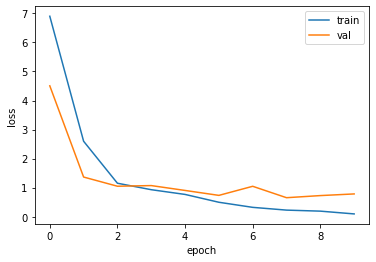

In [80]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [81]:
model1.evaluate(valData1,valTarget1)

1/1 [==============================] - 1s 564ms/step - loss: 0.6533 - accuracy: 0.7241


[0.6533289551734924, 0.7241379022598267]

In [82]:
classes = ['Chair','Laptop','Piano']

In [83]:
print(classes[np.argmax(pred)])

Laptop


In [84]:
pred = model1.predict(testData[0:1])
print(pred)

1/1 [==============================] - 0s 126ms/step
[[1. 0. 0.]]


In [85]:
print(classes[np.argmax(pred)])

Chair


In [86]:
pred = model1.predict(testData[1:2])
print(pred)

1/1 [==============================] - 0s 56ms/step
[[0. 1. 0.]]


In [87]:
print(classes[np.argmax(pred)])

Laptop
